Michael Tong - Problem Set 1 Q4

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error, explained_variance_score

In [2]:
df_m = pd.read_csv("./../../data/boston_housing/boston_housing_compiled.csv")
print("Original dataset shape:", df_m.shape)

Original dataset shape: (506, 14)


In [3]:
print(df_m.isna().sum())

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64


In [4]:
df = df_m.dropna()
df.shape

(452, 14)

For target regression: CRIM
Mean of target: 1.4208250442477877


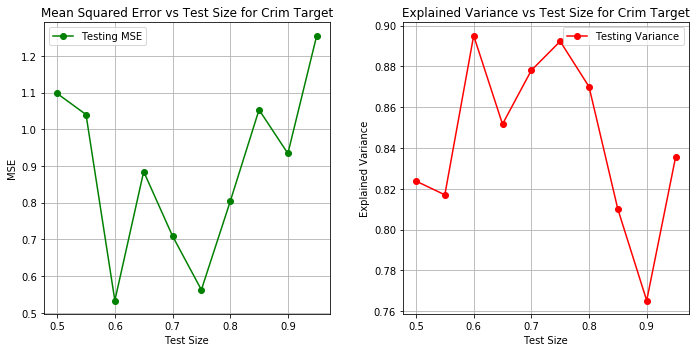


For target regression: ZN
Mean of target: 12.721238938053098


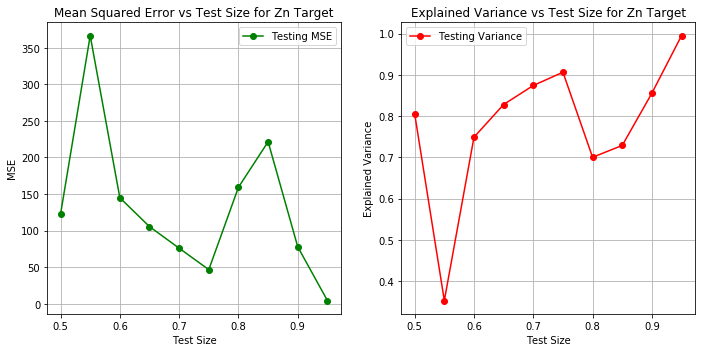


For target regression: INDUS
Mean of target: 10.304889380530975


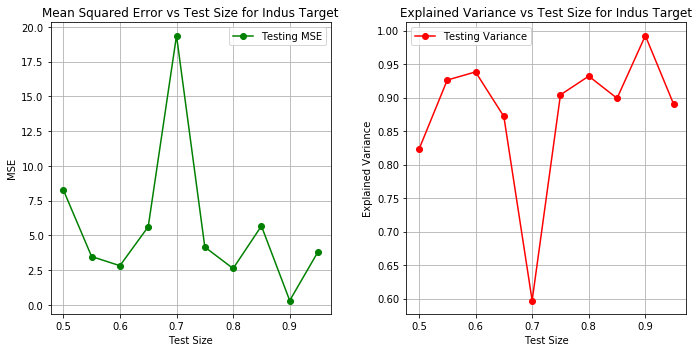


For target regression: CHAS
Mean of target: 0.07743362831858407


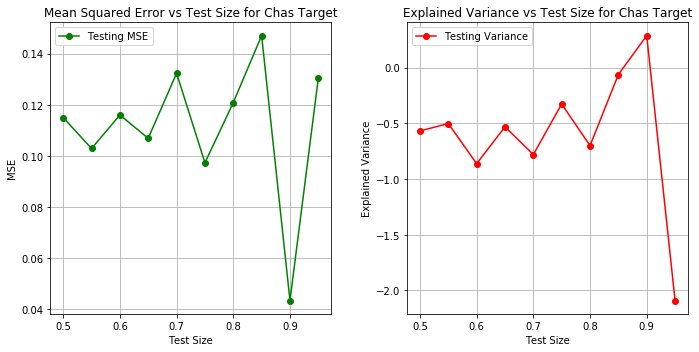


For target regression: NOX
Mean of target: 0.5408157079646018


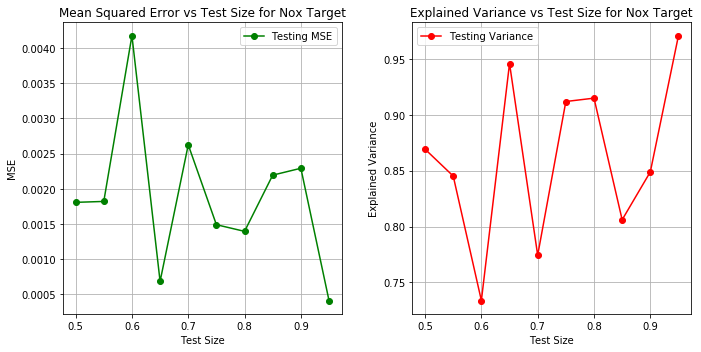


For target regression: RM
Mean of target: 6.343537610619469


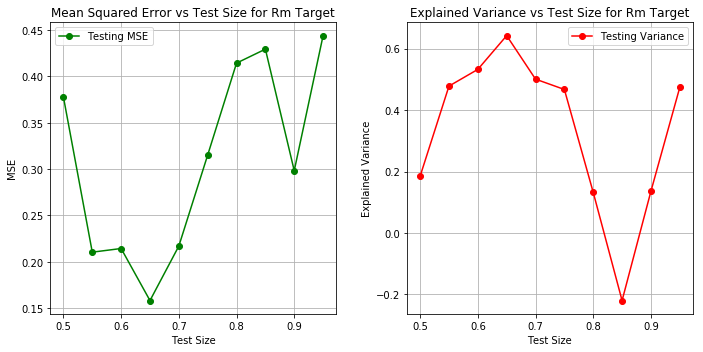


For target regression: AGE
Mean of target: 65.55796460176991


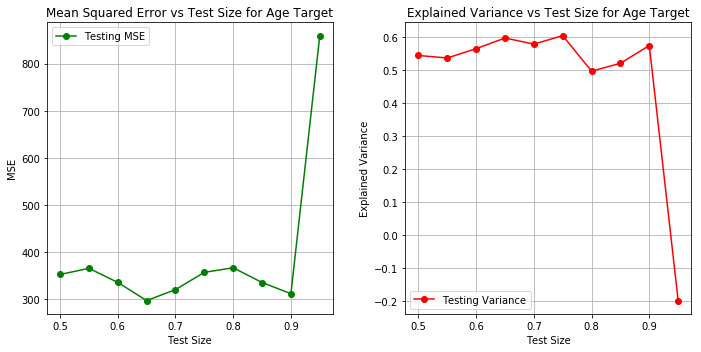


For target regression: DIS
Mean of target: 4.043570353982301


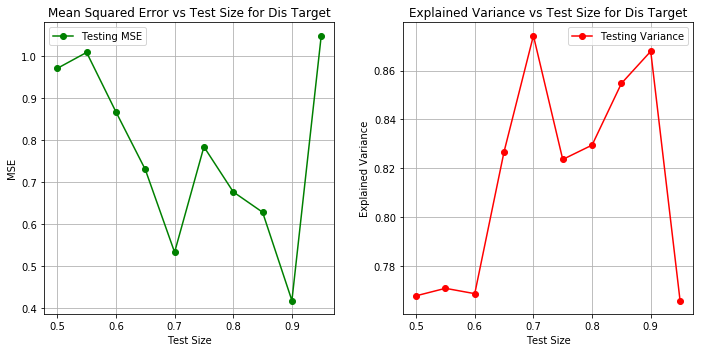


For target regression: RAD
Mean of target: 7.823008849557522


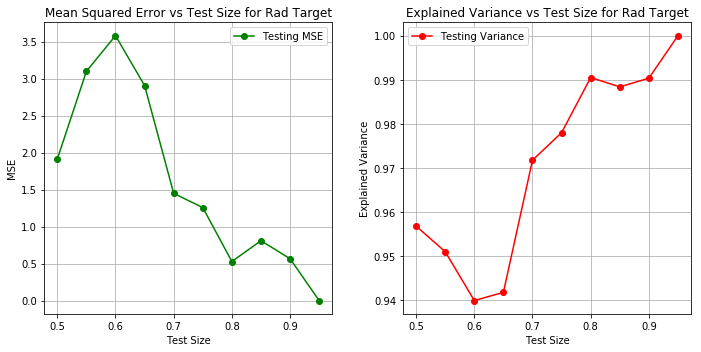


For target regression: TAX
Mean of target: 377.4424778761062


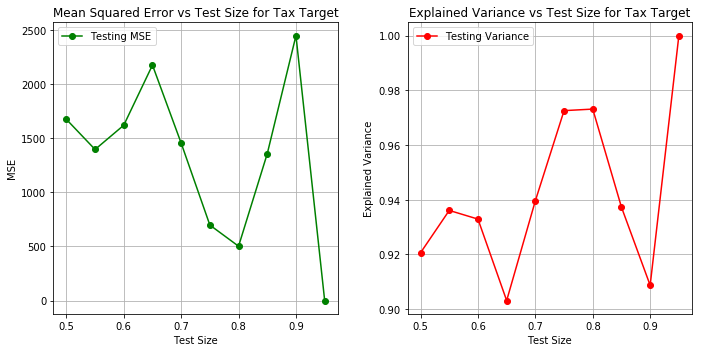


For target regression: PTRATIO
Mean of target: 18.24712389380531


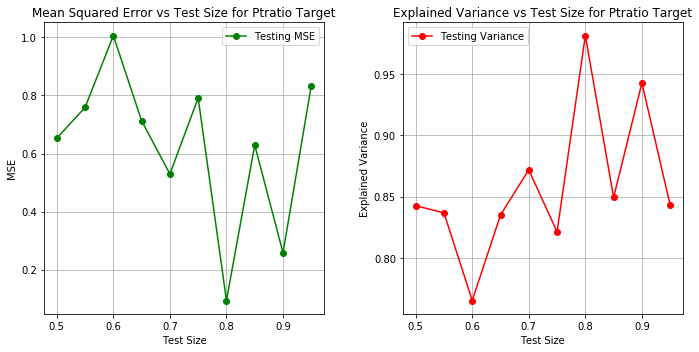


For target regression: B
Mean of target: 369.8265044247787


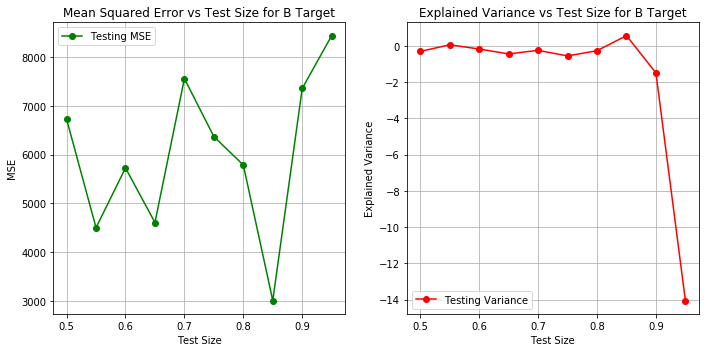


For target regression: LSTAT
Mean of target: 11.441880530973453


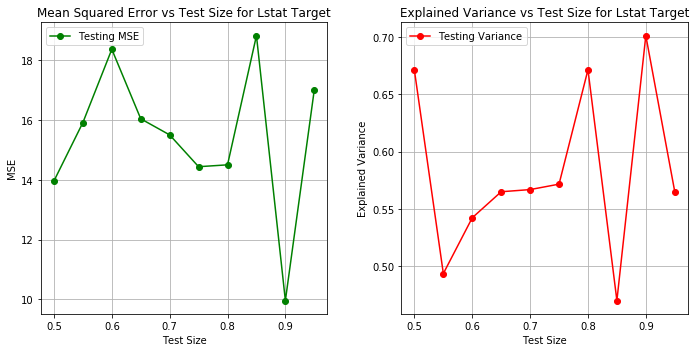


For target regression: MEDV
Mean of target: 23.750442477876106


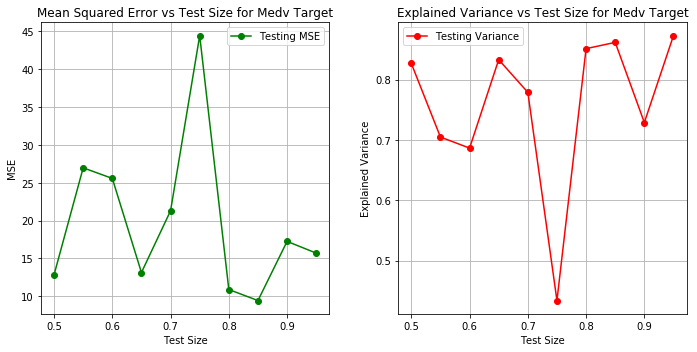

In [5]:
for target in df.columns:
    training_MSE = []
    training_variance = []
    testing_MSE = []
    testing_variance = []
    
    train_sizes = np.linspace(0.5, 1.0, 10, endpoint=False)
    for i in train_sizes:
        X = df.drop(columns=[target], axis=1)
        y = df[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-i))
        clf = DecisionTreeRegressor()
        clf.fit(X_train, y_train)
        preds_train = clf.predict(X_train)
        preds_test = clf.predict(X_test)
        training_MSE.append(mean_squared_error(y_true=y_train, y_pred=preds_train))
        training_variance.append(explained_variance_score(y_true=y_train, y_pred=preds_train))
        testing_MSE.append(mean_squared_error(y_true=y_test, y_pred=preds_test))
        testing_variance.append(explained_variance_score(y_true=y_test, y_pred=preds_test))

    print("For target regression:", target)
    print("Mean of target:", df[target].mean())
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    ax1.plot(train_sizes, testing_MSE, 'o-', color="g",
             label="Testing MSE")
    ax1.legend(loc="best")
    ax1.set_xlabel('Test Size')
    ax1.set_ylabel('MSE')
    ax1.set_title('Mean Squared Error vs Test Size for {} Target'.format(
        target.capitalize()))
    ax1.grid()
    
    ax2.plot(train_sizes, testing_variance, 'o-', color="r",
             label="Testing Variance")
    ax2.legend(loc="best")
    ax2.set_xlabel('Test Size')
    ax2.set_ylabel('Explained Variance')
    ax2.set_title('Explained Variance vs Test Size for {} Target'.format(
        target.capitalize()))
    ax2.grid()
    
    plt.tight_layout()
    plt.show()
    
    print()

In [11]:
from graphviz import Source
import pydot

ModuleNotFoundError: No module named 'pydot'

In [8]:
target = 'RAD'
X = df.drop(columns=[target], axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)

export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)

dot_data = export_graphviz(dt_classifier, out_file=None, feature_names=X.columns))
pdot = pydot.graph_from_dot_data(dot_data)
# Access element [0] because graph_from_dot_data actually returns a list of DOT elements.
pdot[0].set_graph_defaults(size = "\"15,15\"")
graph = Source(pdot[0].to_string())
graph

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<X<SUB>0</SUB> &le; 3.044<br/>mse = 54.501<br/>samples = 339<br/>value = 7.59>, fillcolor="#e5813949"] ;\n1 [label=<X<SUB>0</SUB> &le; 0.074<br/>mse = 4.151<br/>samples = 284<br/>value = 4.479>, fillcolor="#e5813927"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<X<SUB>0</SUB> &le; 0.03<br/>mse = 2.737<br/>samples = 90<br/>value = 3.344>, fillcolor="#e581391a"] ;\n1 -> 2 ;\n3 [label=<X<SUB>1</SUB> &le; 92.5<br/>mse = 1.535<br/>samples = 23<br/>value = 2.174>, fillcolor="#e581390d"] ;\n2 -> 3 ;\n4 [label=<X<SUB>2</SUB> &le; 3.36<br/>mse = 1.09<br/>samples = 20<br/>value = 1.9>, fillcolor="#e581390a"] ;\n3 -> 4 ;\n5 [label=<X<SUB>9</SUB> &le; 18.25<br/>mse = 0.531<br/>samples = 14<br/>value = 1.429>, fillcolor="#e5813905"] ;\n4 -> 5 ;\n6 [label=<X<SUB>8</SUB> &le; 306.5<br/>mse = 0.149<br/>samples = 11<br/>value = 1.182>, fil